In [1]:
from nltk.corpus import gutenberg as gut

In [2]:
gut.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [56]:
bryant = gut.words('bryant-stories.txt')
print(bryant[0:50])

['[', 'Stories', 'to', 'Tell', 'to', 'Children', 'by', 'Sara', 'Cone', 'Bryant', '1918', ']', 'TWO', 'LITTLE', 'RIDDLES', 'IN', 'RHYME', 'There', "'", 's', 'a', 'garden', 'that', 'I', 'ken', ',', 'Full', 'of', 'little', 'gentlemen', ';', 'Little', 'caps', 'of', 'blue', 'they', 'wear', ',', 'And', 'green', 'ribbons', ',', 'very', 'fair', '.', '(', 'Flax', '.)', 'From', 'house']


In [14]:
from nltk.corpus import PlaintextCorpusReader as plr

help(plr)

Help on class PlaintextCorpusReader in module nltk.corpus.reader.plaintext:

class PlaintextCorpusReader(nltk.corpus.reader.api.CorpusReader)
 |  Reader for corpora that consist of plaintext documents.  Paragraphs
 |  are assumed to be split using blank lines.  Sentences and words can
 |  be tokenized using the default tokenizers, or by custom tokenizers
 |  specificed as parameters to the constructor.
 |  
 |  This corpus reader can be customized (e.g., to skip preface
 |  sections of specific document formats) by creating a subclass and
 |  overriding the ``CorpusView`` class variable.
 |  
 |  Method resolution order:
 |      PlaintextCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, fileids, word_tokenizer=WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>), sent_tokenizer=<nltk.tokenize.punkt.PunktSentenceTokenizer ob

In [28]:
root = r"C:\Users\echo\Desktop"
print(root)
reader = plr( root , 'SCHEME.txt')
reader.fileids()

C:\Users\echo\Desktop


['SCHEME.txt']

In [33]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [53]:
smallcate = brown.categories()[0:5]
genre_word = [
    (genre , word )
    for genre in smallcate
    for word in brown.words(categories = genre)
]

print(genre_word[100:120])
print(len(genre_word))

[('adventure', 'be'), ('adventure', 'to'), ('adventure', 'sell'), ('adventure', 'out'), ('adventure', 'to'), ('adventure', 'Al'), ('adventure', 'Budd'), ('adventure', 'and'), ('adventure', 'leave'), ('adventure', 'the'), ('adventure', 'country'), ('adventure', ','), ('adventure', 'but'), ('adventure', 'there'), ('adventure', 'was'), ('adventure', 'a'), ('adventure', 'stubborn'), ('adventure', 'streak'), ('adventure', 'in'), ('adventure', 'him')]
442647


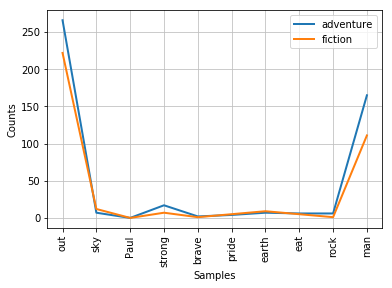

In [52]:
import nltk
cfd = nltk.ConditionalFreqDist( genre_word )
cfd.plot(
    conditions = ['adventure','fiction'],
    samples = [ u'out' , u'sky',u'Paul',u'strong',u'brave',
              u'pride',u'earth',u'eat',u'rock',u'man']
)

In [62]:
def generate_ChainMax( cfdlist , word , num = 10):
    for i in range(num):
        print(word , end=' ')
        word = cfdlist[word].max()

In [58]:
bigrams_bryant = nltk.bigrams( bryant )
cfdlist = nltk.ConditionalFreqDist( bigrams_bryant )
print( type(bigrams_bryant) , type(cfdlist))

<class 'generator'> <class 'nltk.probability.ConditionalFreqDist'>


In [66]:
generate_ChainMax( cfdlist , 'why' , 15)

why it was a little Jackal . " I ' s the little Jackal . 

In [69]:
help( cfdlist['little'])

Help on FreqDist in module nltk.probability object:

class FreqDist(collections.Counter)
 |  A frequency distribution for the outcomes of an experiment.  A
 |  frequency distribution records the number of times each outcome of
 |  an experiment has occurred.  For example, a frequency distribution
 |  could be used to record the frequency of each word type in a
 |  document.  Formally, a frequency distribution can be defined as a
 |  function mapping from each sample to the number of times that
 |  sample occurred as an outcome.
 |  
 |  Frequency distributions are generally constructed by running a
 |  number of experiments, and incrementing the count for a sample
 |  every time it is an outcome of an experiment.  For example, the
 |  following code will produce a frequency distribution that encodes
 |  how often each word occurs in a text:
 |  
 |      >>> from nltk.tokenize import word_tokenize
 |      >>> from nltk.probability import FreqDist
 |      >>> sent = 'This is an example s